# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import time

#google service
from google.cloud import bigquery

# GCP Connection

In [2]:
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'project_id' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

### Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=playground-216119:US:bquxjob_3fbfd69a_186df7e2743)
back to BigQuery to edit the query within the BigQuery user interface.

In [ ]:
# Running this code will display the query used to generate your previous job

job = client.get_job('job_id') # Job ID inserted based on the query results selected to explore
print(job.query)

### Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the


In [ ]:
# Running this code will read results from your previous job

job = client.get_job('job_id') # Job ID inserted based on the query results selected to explore
df = job.to_dataframe()
df

## calling data with sql

### Helper Function

In [3]:
def gcp2df(sql, client):

        t1 = time.time()
        q=client.query(sql)
        results=q.result()
        t2 = time.time()
#        print("results type :", type(results))
 #       print("downloading time:", t2-t1)

        results=results.to_dataframe()
        t3 = time.time()

  #      print("df-ing time:", t3-t2)
   #     print("total time:", t3-t1)
        return results

### connection

In [4]:
project= 'project_id'
dataset='table_id'
client=bigquery.Client(project=project)
dataset_ref=client.dataset(dataset)

table_id = project + '.' + dataset

### SQL Queries

In [5]:
query = """
       query
  """.format(table=table_id)

df=gcp2df(query, client)

# Information of df

In [9]:
df.head(20)

,numerical_feature,categorical_feature_1,categorical_feature_2,categorical_feature_3,categorical_feature_4
index,,,,,
item_1,1330,categorical_value_1,categorical_value_1,categorical_value_1,categorical_value_1
item_2,1689,categorical_value_1,categorical_value_1,categorical_value_2,categorical_value_2
item_3,1781,categorical_value_1,categorical_value_1,categorical_value_2,categorical_value_2
item_4,574,categorical_value_1,categorical_value_1,categorical_value_2,categorical_value_2
item_5,593,categorical_value_1,categorical_value_1,categorical_value_2,categorical_value_2
item_6,718,categorical_value_1,categorical_value_1,categorical_value_2,categorical_value_2
item_7,734,categorical_value_1,categorical_value_1,categorical_value_2,categorical_value_2
item_8,1610,categorical_value_1,categorical_value_1,categorical_value_2,categorical_value_2
item_9,1582,categorical_value_1,categorical_value_1,categorical_value_1,categorical_value_3


## column types and null count

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 464205 entries, item_1 to item_464205
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   numerical_feature      464205 non-null  Int64 
 1   categorical_feature_1  464205 non-null  object
 2   categorical_feature_2  464205 non-null  object
 3   categorical_feature_3  464205 non-null  object
 4   categorical_feature_4  464205 non-null  object
dtypes: Int64(1), object(4)
memory usage: 21.7+ MB


# Relationship between numerical and categorical data

## Relationship between numerical_feature and categorical_features (Dominant categories of each categorical features)

After calculating the correlation between two columns, it is essential to check for imbalances in the dataset. This is important because any imbalance can indicate the presence of a significant relationship between the two variables.

(-0.5, 9.5, -660.8000000000001, 18782.8)

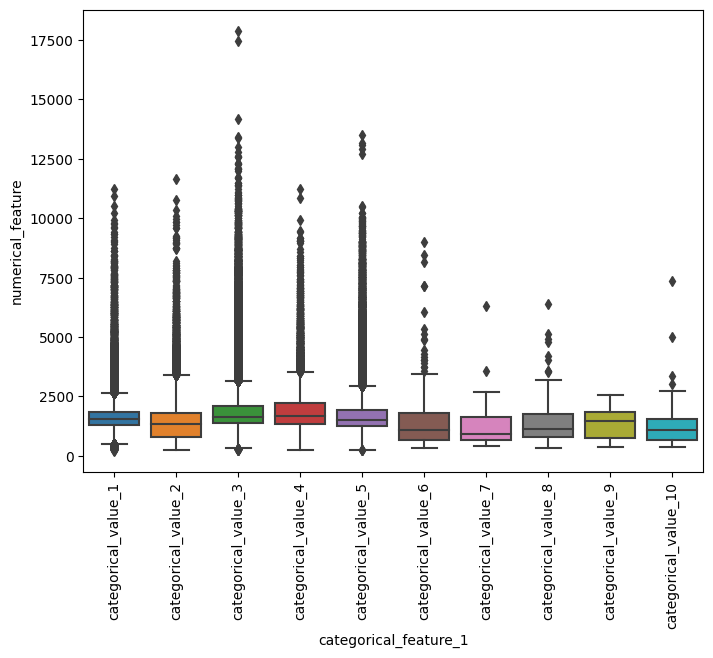

In [12]:
#box plot overallqual/saleprice
var = 'categorical_feature_1'
data = pd.concat([df['numerical_feature'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="numerical_feature", data=data)
plt.xticks(rotation=90)
fig.axis()

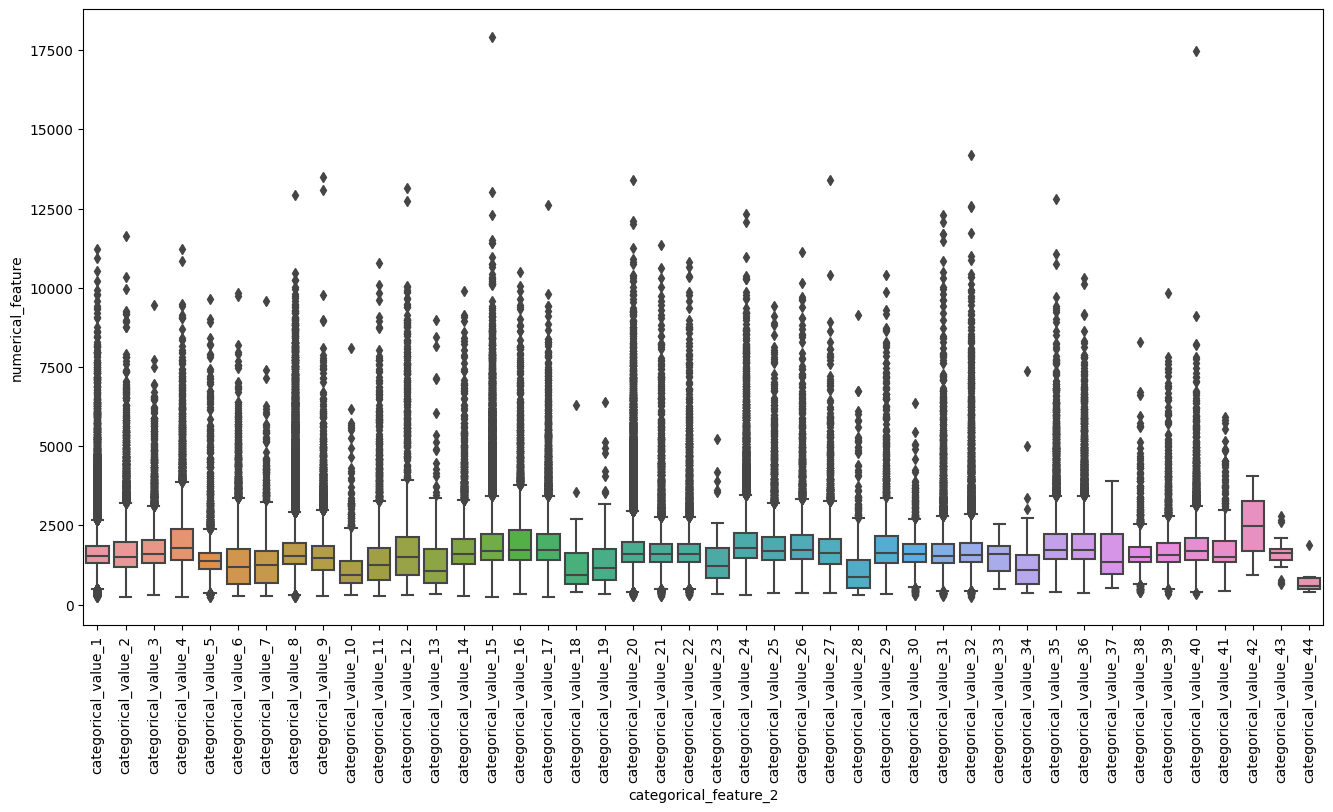

In [13]:
var = 'categorical_feature_2'
data = pd.concat([df['numerical_feature'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="numerical_feature", data=data)
fig.axis();
plt.xticks(rotation=90);

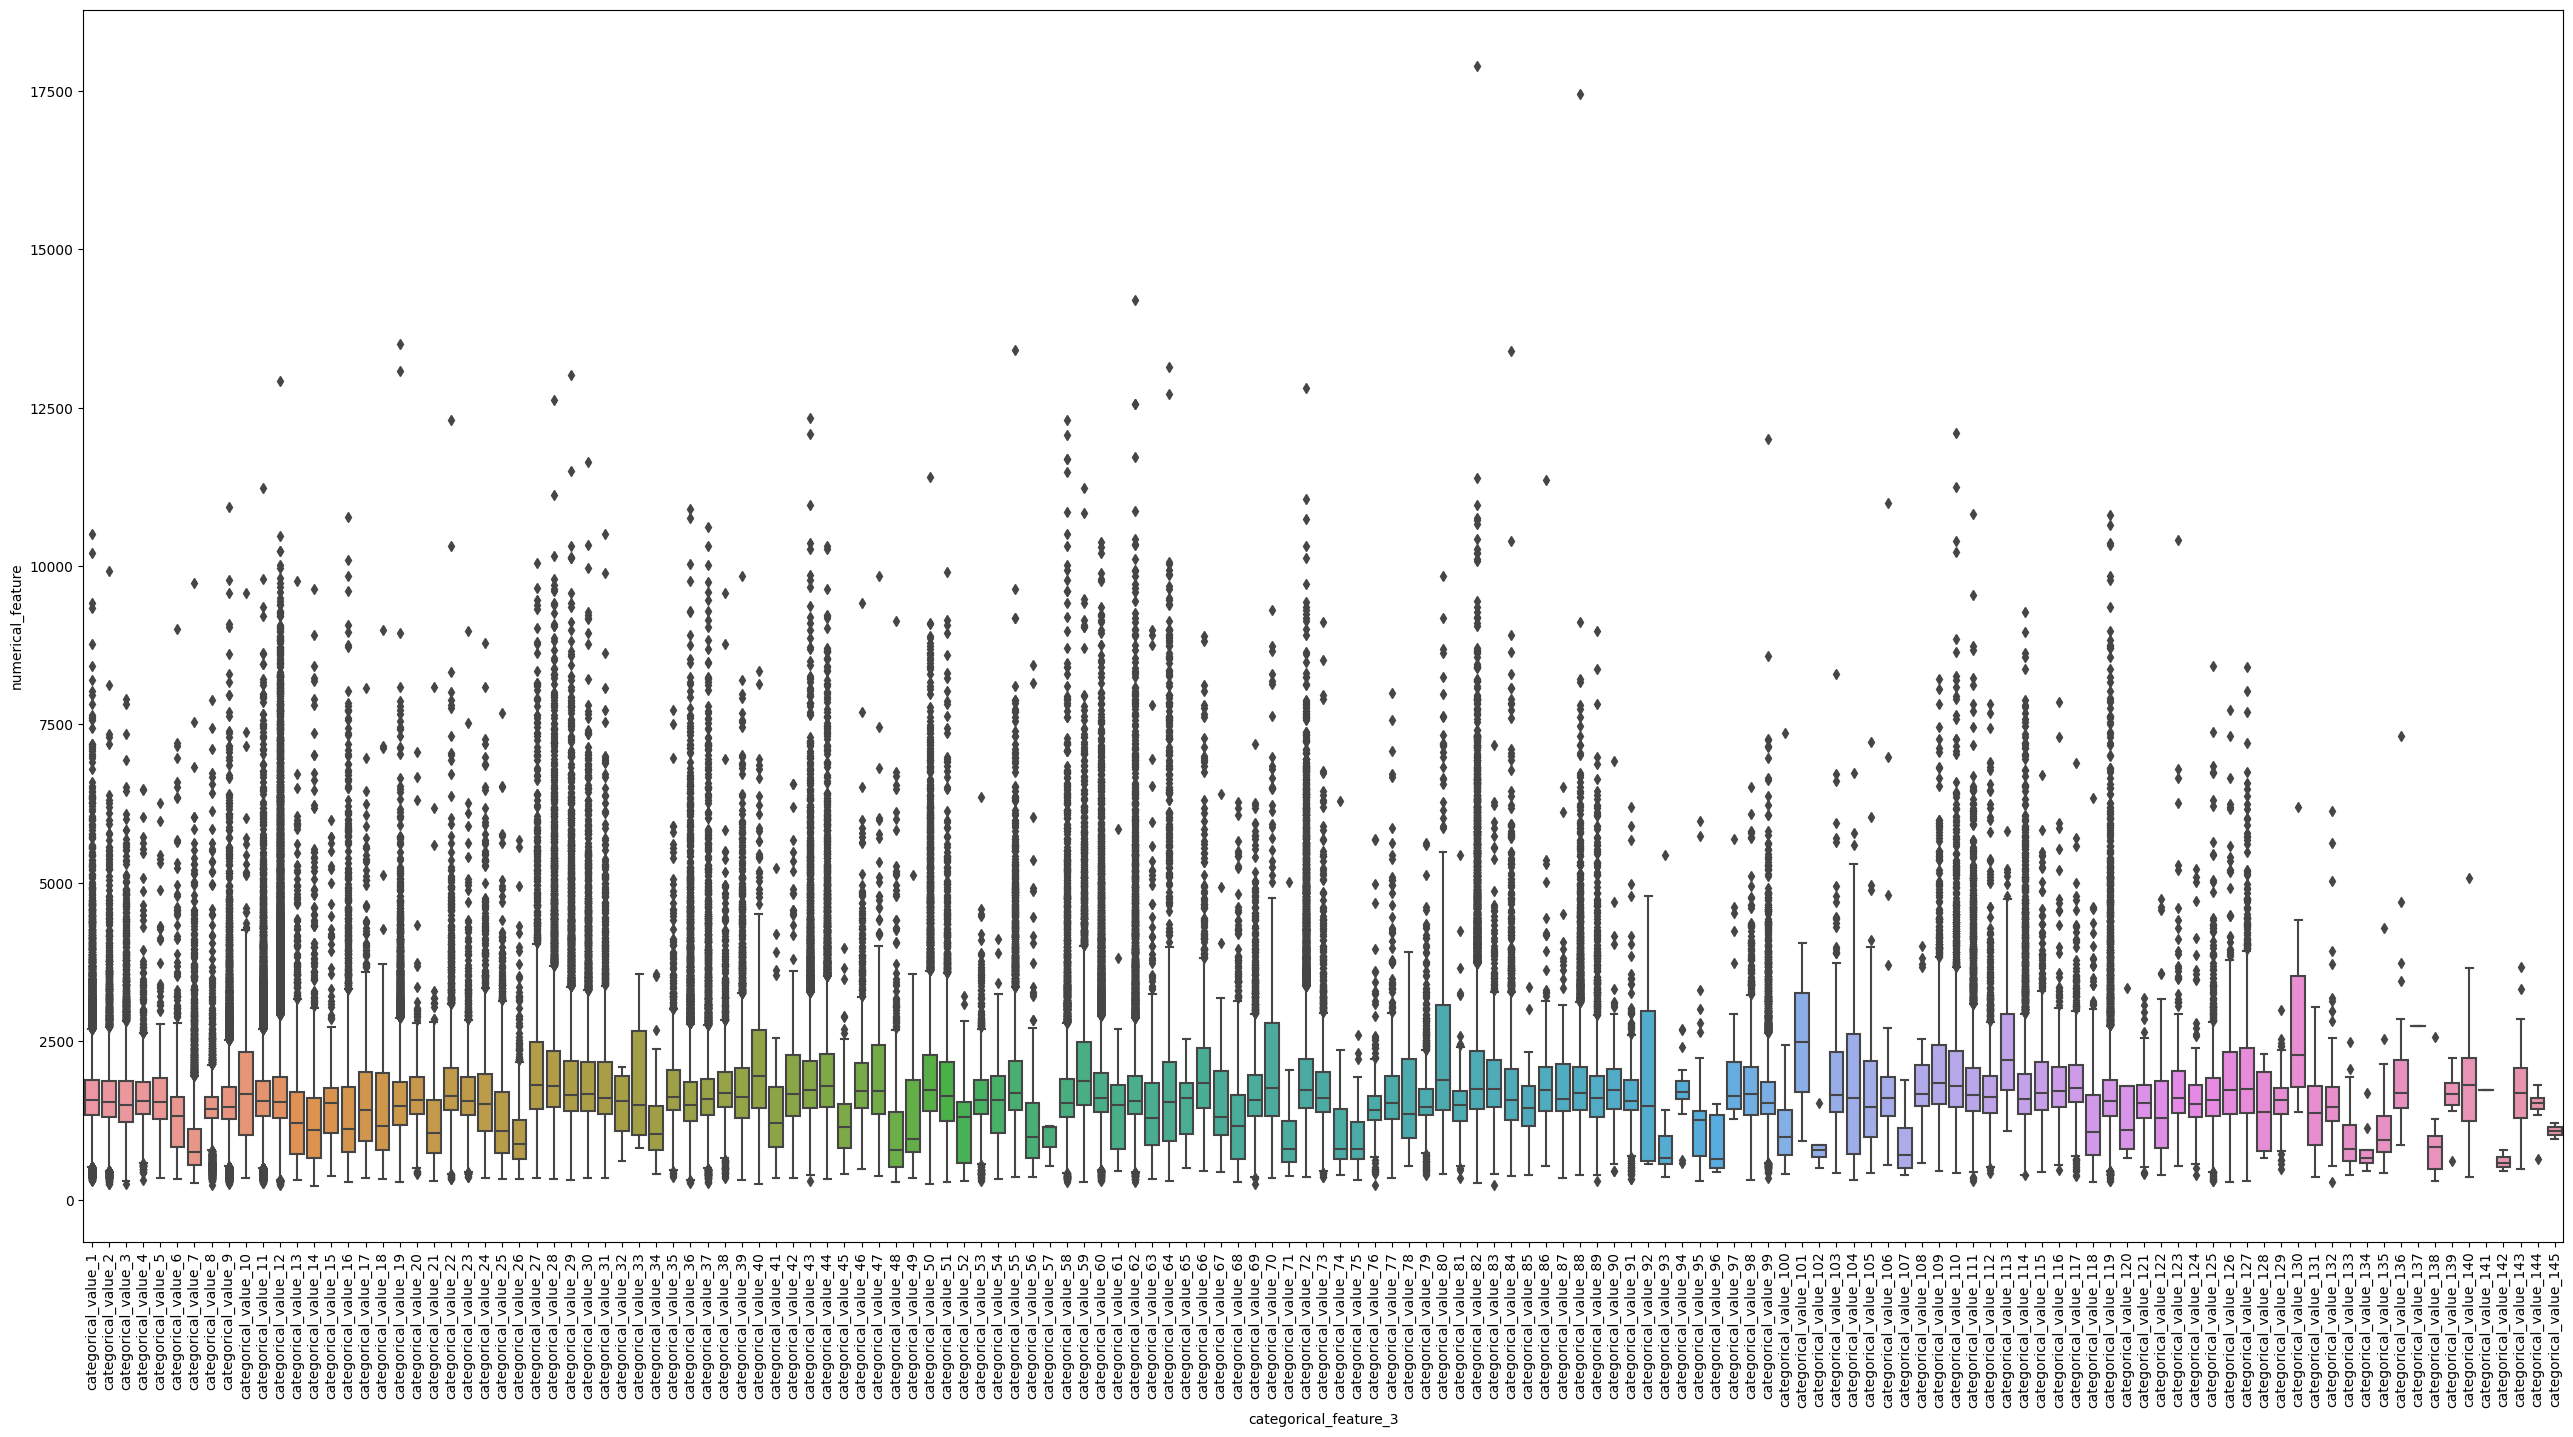

In [14]:
var = 'categorical_feature_3'
data = pd.concat([df['numerical_feature'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(32, 16))
fig = sns.boxplot(x=var, y="numerical_feature", data=data)
fig.axis();
plt.xticks(rotation=90);

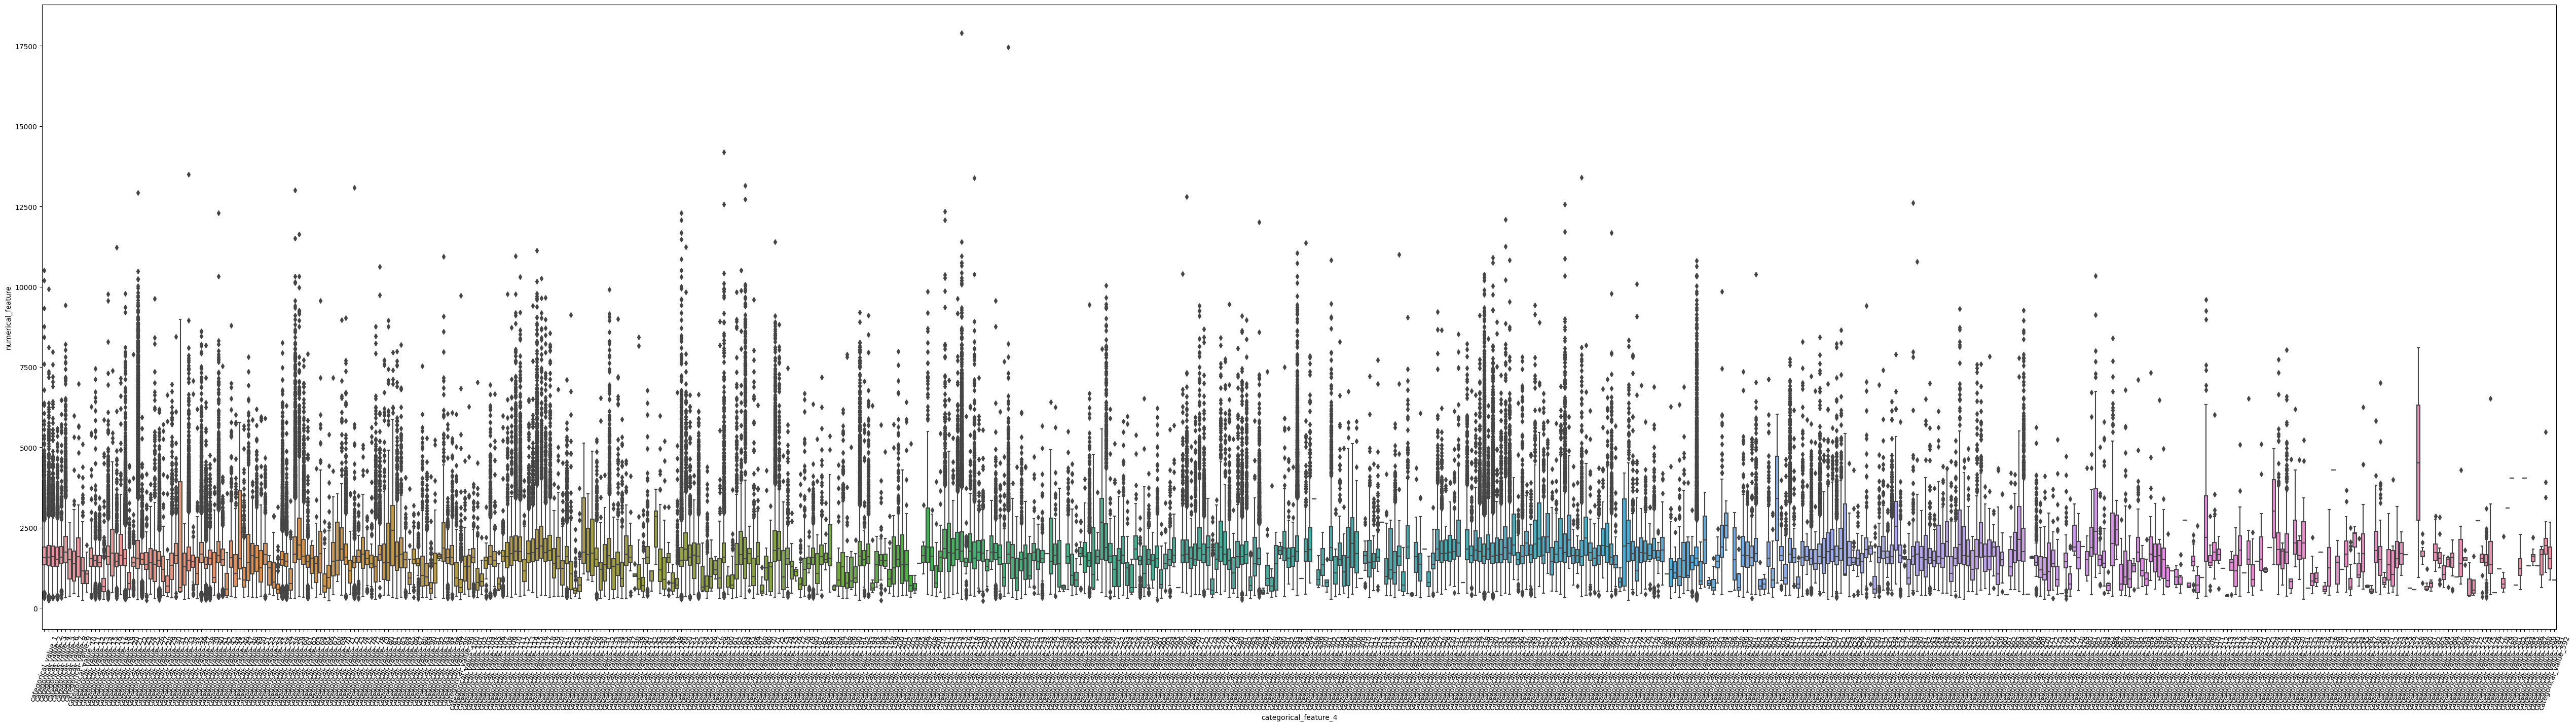

In [15]:
var = 'categorical_feature_4'
data = pd.concat([df['numerical_feature'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(64, 16))
fig = sns.boxplot(x=var, y="numerical_feature", data=data)
#fig.set_xticklabels(fig.get_xticks(), size = 100,rotation=70)

fig.axis();
plt.xticks(rotation=70);

# Relationship between two categorical variables


**Determining Relationships between Categorical Variables using Chi-Square Tests and Contingency Tables**

When examining the relationship between two categorical variables, you can employ chi-square tests. This statistical test helps determine whether two categorical variables are independent or if there is a significant relationship between them. Independence implies that changes in one variable do not affect the probability distribution of the other, while a relationship suggests that the distribution of one variable depends on the levels of the other. The test assesses differences in the observed conditional distribution of one variable across levels of the other and compares it to the overall distribution of that variable. The chi-square test is typically conducted using a contingency table.

**Understanding Contingency Tables:**

To compare the chi-square test statistic with a contingency table, it's crucial to grasp what a contingency table is. A contingency table displays the frequency distribution of two or more categorical variables. Each cell in the table represents the frequency of a specific combination of categories for the two variables. Essentially, it shows how these two categorical variables are related.

**Rows:** The categories of one variable define the rows of the table.
Columns: The categories of the other variable define the columns of the table.
Steps for Comparing Chi-Square Test Statistic with a Contingency Table:

**Formulate Hypotheses:** Start by creating the null hypothesis (no association between the two variables) and the alternative hypothesis (an association exists).

**Calculate Expected Frequencies:** Compute the expected frequencies for each cell in the contingency table based on the assumption of no association.

**Chi-Square Test Statistic:** Calculate the chi-square test statistic using the formula:

chi-square = Σ((O - E)^2 / E),

where O is the observed frequency, and E is the expected frequency for each cell.

**Comparison with Critical Value:** Compare the calculated chi-square test statistic with the critical value from a chi-square distribution table. The degrees of freedom are determined by (number of rows - 1) multiplied by (number of columns - 1). Use a chosen significance level (e.g., 0.05) to make this comparison. If the calculated chi-square value is greater than the critical value, reject the null hypothesis, indicating a significant association between the variables.

**Interpret Results:** If you reject the null hypothesis, it signifies that observed frequencies significantly differ from expected frequencies, providing evidence of an association between the two variables. If you fail to reject the null hypothesis, there is insufficient evidence to conclude an association between the variables.*

## define chi square test

In [16]:
from scipy import stats
def chi_sq_test(cross_tabs):
    """
    Prints the Chi-Squared Statistic, p-value, and degress of freedom from a Chi-Squared test.

    Args:
        cross_tabs: A crosstab dataframe.
    """
    chi2, p, dof, con_table = stats.chi2_contingency(cross_tabs)
    print(f'chi-squared = {chi2}\np value= {p}\ndegrees of freedom = {dof}')

## Defining Statistical Hypotheses

In hypothesis testing, we make choices between two opposing hypotheses:

**Null Hypothesis (H0):** This is a statistical proposition asserting that there is no significant difference between a hypothesized value of a population parameter and its estimated value derived from a sample drawn from that population.

**Alternative Hypothesis (H1 or Ha):** This proposition posits that there is a significant difference between a hypothesized value of a population parameter and its estimated value.


**Null Hypothesis (H0):** There is no significant difference between the levels of categorical_feature_1 and categorical_feature_2.

**Alternative Hypothesis (H1 or Ha):** There is a significant difference between the levels of categorical_feature_1 and categorical_feature_2.



We conducted a hypothesis test at different significance levels **(alpha) of 0.05, 0.10, and 0.001.**

Our analysis indicates that the p-value obtained from the test is less than all three alpha levels. Therefore, we reject the null hypothesis. This finding supports our earlier conclusion that categorical_feature_1 and categorical_feature_2 are not independent."

## creating cross tab

In the Chi-Square test, we organize the data in a cross-tabulation (contingency) format. Each row represents a level (group) of one variable, while each column corresponds to a level (group) of another variable.

### testing for categorical_feature_1 and categorical_feature_2

In [17]:
tabs = pd.crosstab(df.categorical_feature_1, df.categorical_feature_2)

In [18]:
tabs

categorical_feature_2,categorical_value_1,categorical_value_10,categorical_value_11,categorical_value_12,categorical_value_13,categorical_value_14,categorical_value_15,categorical_value_16,categorical_value_17,categorical_value_18,...,categorical_value_40,categorical_value_41,categorical_value_42,categorical_value_43,categorical_value_44,categorical_value_5,categorical_value_6,categorical_value_7,categorical_value_8,categorical_value_9
categorical_feature_1,,,,,,,,,,,,,,,,,,,,,
categorical_value_1,81622,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,6036,0,0,0,0
categorical_value_10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
categorical_value_2,0,1613,3681,0,0,0,0,0,0,0,...,0,0,0,0,0,0,12037,2826,0,0
categorical_value_3,0,0,0,0,0,0,46913,0,8841,0,...,15844,476,0,45,0,0,0,0,0,0
categorical_value_4,0,0,0,0,0,5691,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
categorical_value_5,0,0,0,2487,0,0,0,4955,0,0,...,0,0,0,0,0,0,0,0,58740,21762
categorical_value_6,0,0,0,0,245,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
categorical_value_7,0,0,0,0,0,0,0,0,0,52,...,0,0,0,0,0,0,0,0,0,0
categorical_value_8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### applying chi square testing

In [19]:
chi_sq_test(tabs)

chi-squared = 4177845.0
p value= 0.0
degrees of freedom = 387


## All Categorical Features chi square

Null Hypothesis → There is no significant difference between **categorical_feature_1** and **categorical_feature_2** level.

Alternative Hypothesis → There is a significant difference between **categorical_feature_1** and **categorical_feature_2** level.

In [20]:
tabs = pd.crosstab(df.categorical_feature_1, df.categorical_feature_2)
chi_sq_test(tabs)

chi-squared = 4177845.0
p value= 0.0
degrees of freedom = 387


Null Hypothesis → There is no significant difference between **categorical_feature_1** and **categorical_feature_3** level.

Alternative Hypothesis → There is a significant difference between **categorical_feature_1** and **categorical_feature_3** level.

In [21]:
tabs = pd.crosstab(df.categorical_feature_1, df.categorical_feature_3)
chi_sq_test(tabs)

chi-squared = 4121687.611445504
p value= 0.0
degrees of freedom = 1296


Null Hypothesis → There is no significant difference between **categorical_feature_1** and **categorical_feature_4** level.

Alternative Hypothesis → There is a significant difference between **categorical_feature_1** and **categorical_feature_4** level.

In [22]:
tabs = pd.crosstab(df.categorical_feature_1, df.categorical_feature_4)
chi_sq_test(tabs)

chi-squared = 3966701.2464700546
p value= 0.0
degrees of freedom = 5319


Null Hypothesis → There is no significant difference between **categorical_feature_2** and **categorical_feature_3** level.

Alternative Hypothesis → There is a significant difference between **categorical_feature_2** and **categorical_feature_3** level.

In [23]:
tabs = pd.crosstab(df.categorical_feature_2, df.categorical_feature_3)
chi_sq_test(tabs)

chi-squared = 17026368.882757694
p value= 0.0
degrees of freedom = 6192


Null Hypothesis → There is no significant difference between **categorical_feature_2** and **categorical_feature_4** level.

Alternative Hypothesis → There is a significant difference between **categorical_feature_2** and **categorical_feature_4** level.

In [24]:
tabs = pd.crosstab(df.categorical_feature_2, df.categorical_feature_4)
chi_sq_test(tabs)

chi-squared = 17411528.776567232
p value= 0.0
degrees of freedom = 25413


Null Hypothesis → There is no significant difference between **categorical_feature_3** and **categorical_feature_4** level.

Alternative Hypothesis → There is a significant difference between **categorical_feature_3** and **categorical_feature_4** level.

In [25]:
tabs = pd.crosstab(df.categorical_feature_3, df.categorical_feature_4)
chi_sq_test(tabs)

chi-squared = 61026906.216495074
p value= 0.0
degrees of freedom = 85104


# Conclusion

I compared the calculated chi-square test statistics with critical values from a chi-square distribution table. The degrees of freedom were determined by (number of rows - 1) times (number of columns - 1). This analysis was performed at specific significance levels (0.01, 0.05, 0.001). The results showed that all of the calculated chi-square test statistics exceeded the critical values for each significance level. Therefore, I reject all null hypotheses, indicating a significant difference between all pairs of categorical features. In other words, there is no relationship between any of the categorical features:


* categorical_feature_1 & categorical_feature_2

* categorical_feature_1 & categorical_feature_3

* categorical_feature_1 & categorical_feature_4

* categorical_feature_2 & categorical_feature_3

* categorical_feature_2 & categorical_feature_4

* categorical_feature_3 & categorical_feature_4




** here the chi-square distrubution table → https://en.wikibooks.org/wiki/Engineering_Tables/Chi-Squared_Distribution
